In [ ]:
import pandas as pd

# Load CSV file
df = pd.read_csv('loan_data.csv')

# Display the first 5 rows
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Sort by LoanAmount (descending)
df.sort_values(by='LoanAmount', ascending=False).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N


In [ ]:
df1 = pd.DataFrame({
    'Loan_ID': ['LP001002', 'LP001003'],
    'Loan_Status': ['Y', 'N']
})

df2 = pd.DataFrame({
    'Loan_ID': ['LP001002', 'LP001003'],
    'Property_Area': ['Urban', 'Rural']
})

merged = pd.merge(df1, df2, on='Loan_ID')
merged

,Loan_ID,Loan_Status,Property_Area
0,LP001002,Y,Urban
1,LP001003,N,Rural


In [ ]:
# Create a new column 'TotalIncome'
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

def income_category(income):
    if income < 2500:
        return 'Low'
    elif income < 6000:
        return 'Medium'
    else:
        return 'High'

df['Income_Category'] = df['TotalIncome'].apply(income_category)
df[['TotalIncome', 'Income_Category']].head()

,TotalIncome,Income_Category
0,5849.0,Medium
1,6091.0,High
2,3000.0,Medium
3,4941.0,Medium
4,6000.0,High


In [ ]:
# Add 10% tax to LoanAmount
df['LoanAmount_Tax'] = df['LoanAmount'].apply(lambda x: x * 1.1)
df[['LoanAmount', 'LoanAmount_Tax']].head()

,LoanAmount,LoanAmount_Tax
0,146.412162,161.053378
1,128.000000,140.800000
2,66.000000,72.600000
3,120.000000,132.000000
4,141.000000,155.100000


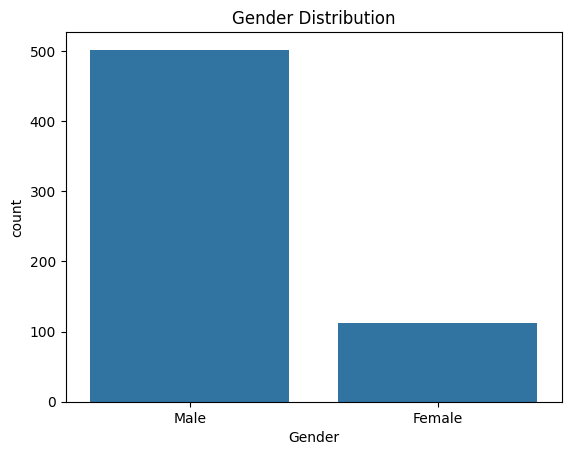

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot gender count
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

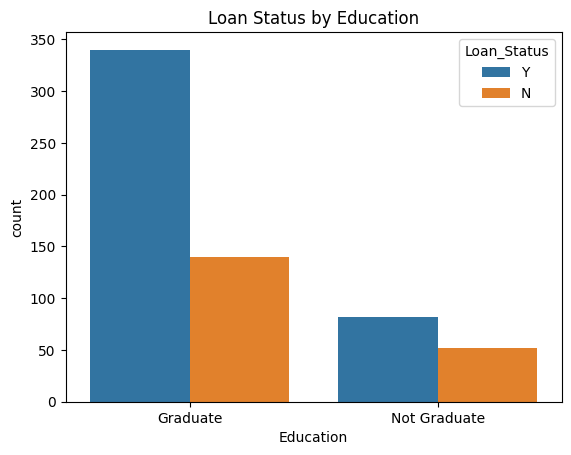

In [ ]:
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')
plt.show()

In [ ]:
df.to_csv('cleaned_loan_data.csv', index=False)

In [22]:
import pandas as pd

# Loan application data
loan_df = pd.DataFrame({
    'Loan_ID': ['LP001002', 'LP001003', 'LP001004', 'LP001005'],
    'Gender': ['Male', 'Male', 'Male', 'Male'],
    'Married': ['No', 'Yes', 'Yes', 'Yes'],
    'ApplicantIncome': [5849, 4583, 3000, 2583]
})

# Income data from another source
income_df = pd.DataFrame({
    'Loan_ID': ['LP001002', 'LP001003', 'LP001006'],
    'AdditionalIncome': [0, 1500, 2400]
})

In [23]:
inner_join = pd.merge(loan_df, income_df, on='Loan_ID', how='inner')
print("INNER JOIN:")
print(inner_join)

INNER JOIN:
    Loan_ID Gender Married  ApplicantIncome  AdditionalIncome
0  LP001002   Male      No             5849                 0
1  LP001003   Male     Yes             4583              1500


In [24]:
left_join = pd.merge(loan_df, income_df, on='Loan_ID', how='left')
print("LEFT JOIN:")
print(left_join)

LEFT JOIN:
    Loan_ID Gender Married  ApplicantIncome  AdditionalIncome
0  LP001002   Male      No             5849               0.0
1  LP001003   Male     Yes             4583            1500.0
2  LP001004   Male     Yes             3000               NaN
3  LP001005   Male     Yes             2583               NaN


In [28]:
right_join = pd.merge(loan_df, income_df, on='Loan_ID', how='right')
print("RIGHT JOIN:")
print(right_join)

RIGHT JOIN:
    Loan_ID Gender Married  ApplicantIncome  AdditionalIncome
0  LP001002   Male      No           5849.0                 0
1  LP001003   Male     Yes           4583.0              1500
2  LP001006    NaN     NaN              NaN              2400


In [30]:
outer_join = pd.merge(loan_df, income_df, on='Loan_ID', how='outer')
print("OUTER JOIN:")
print(outer_join)

OUTER JOIN:
    Loan_ID Gender Married  ApplicantIncome  AdditionalIncome
0  LP001002   Male      No           5849.0               0.0
1  LP001003   Male     Yes           4583.0            1500.0
2  LP001004   Male     Yes           3000.0               NaN
3  LP001005   Male     Yes           2583.0               NaN
4  LP001006    NaN     NaN              NaN            2400.0
